# Sentiment Analysis Using Machine Learning & Deep Learning Models 

**Overview :** Explore text-based emotion recognition, a dynamic field in NLP, focusing on deciphering diverse emotional states in textual content.

**Objective :** The main purpose of this project is to understand the different models or algorithms which could be used for sentiment analysis on a dataset of many customer reviews from Amazon. This understanding could also help in finding out how different models work and the accuracy of the model for better use.

**About Dataset :** The dataset that we will use is taken from Kaggle website and can be downloaded here: 
<a href="https://www.kaggle.com/datasets/eswarchandt/amazon-music-reviews">Kaggle Link</a>

Overall, the dataset talks about the feedback received after the customers purchased musical instruments from Amazon.

## The Dataset

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import re
import nltk
import nltk.corpus
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

# Text Polarity
from textblob import TextBlob 
'''It provides a simple API for diving into common natural language processing (NLP) tasks such as 
part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.'''
# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Word Cloud
from wordcloud import WordCloud

# Text Polarity
from textblob import TextBlob
# Text Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Word Cloud
from wordcloud import WordCloud

# Model Building
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# Model Metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn. preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dprsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dprsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dprsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [169]:
df = pd.read_csv("Instruments_Reviews.csv")
df.head(5)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


**Description of columns in the file:**

- **reviewerID -** ID of the reviewer, e.g. A2SUAM1J3GNN3B
- **asin -** ID of the product, e.g. 0000013714
- **reviewerName -** name of the reviewer
- **helpful -** helpfulness rating of the review, e.g. 2/3
- **reviewText -** text of the review
- **overall -** rating of the product
- **summary -** summary of the review
- **unixReviewTime -** time of the review (unix time)
- **reviewTime -** time of the review (raw)

In [6]:
df.shape

(10261, 9)

## Data Pre-processing

In [8]:
df.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

From above, there are two columns in the dataset with null values: reviewText and reviewerName. While the latter one is not really important, we should focus on the first column. We cannot remove these rows because the ratings and summary given from the customers will have some effects to our model later (although the number of missing rows is small). Because of it, we can fill the empty values with an empty string.

In [10]:
df.reviewText.fillna(value="", inplace=True)

C:\Users\dprsh\AppData\Local\Temp\ipykernel_32876\1576756417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.reviewText.fillna(value="", inplace=True)


In [11]:
df["reviews"] = df["reviewText"] + " " + df["summary"]
df.drop(columns = ["reviewText", "summary"], axis=1, inplace=True)

In [12]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [13]:
df["reviews"][0]

"Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing, good"

In [14]:
df.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


From the description above, we know that the ratings given from the customers will have the range of [1, 5] as shown above. Also, the average rating given to musical instruments sold is 4.48.

**Percentages of Ratings Given from The Customers**

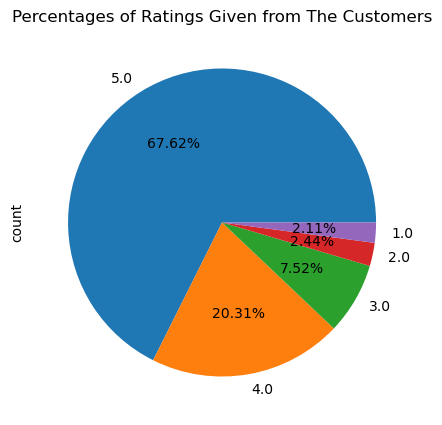

In [17]:
df.overall.value_counts().plot(kind = "pie", legend = False, autopct = "%1.2f%%", fontsize = 10, figsize=(5,5))
plt.title("Percentages of Ratings Given from The Customers", loc = "center")
plt.show()

From the chart above, the majority of musical instruments sold on Amazon have perfect ratings of 5.0, meaning the condition of the products are good. If we were to denote that ratings above 3 are positive, ratings equal to 3 are neutral, and ratings under 3 are negative, we know that the number of negative reviews given in the dataset are relatively small. This might affect our model later.

**Labelling Products Based On Ratings Given**

In [20]:
def Labelling(Rows):
  if(Rows["overall"] > 3.0):
    Label = "Positive"
  elif(Rows["overall"] < 3.0):
    Label = "Negative"
  else:
    Label = "Neutral"
  return Label

In [21]:
df["sentiment"] = df.apply(Labelling, axis=1)

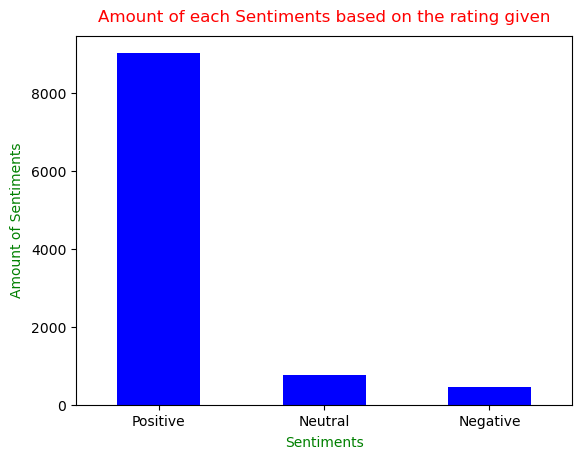

In [22]:
df["sentiment"].value_counts().plot(kind="bar", color="blue")
plt.title("Amount of each Sentiments based on the rating given", loc="center", fontsize=12, color="red", pad=10)
plt.xlabel("Sentiments", color="green", labelpad=5)
plt.xticks(rotation=0)
plt.ylabel("Amount of Sentiments", color="green", labelpad=5)
plt.yticks(rotation=0)
plt.show()

Notice that from the graph we can know that most of our data contains positive sentiments, which is true from the exploration before.

## Text Preprocessing

In [25]:
def Text_Cleaning(Text):
    if not isinstance(Text, str):
        Text = str(Text) if Text is not None else ''
    Text = Text.lower()

    #cleaning punctuations
    punc = str.maketrans(string.punctuation, ' '*len(string.punctuation))
    Text = Text.translate(punc)

    #removing numbers from the text
    Text = re.sub(r'\d+', '', Text)

    #remove possible links
    Text = re.sub('https?://\S+|www\.\S+', '', Text)

    #remove newlines
    Text = re.sub('\n', '', Text)

    return Text

<>:14: SyntaxWarning: invalid escape sequence '\S'
<>:14: SyntaxWarning: invalid escape sequence '\S'
C:\Users\dprsh\AppData\Local\Temp\ipykernel_32876\687422829.py:14: SyntaxWarning: invalid escape sequence '\S'
  Text = re.sub('https?://\S+|www\.\S+', '', Text)


In [26]:
#stopwords removal
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])

def Text_Processing(Text):
    Processed_Text = list()
    Lemmatizer = WordNetLemmatizer()

    #Tokens of words
    Tokens = nltk.word_tokenize(Text)
    
    # Removing Stopwords and Lemmatizing Words
    # To reduce noises in our dataset, also to keep it simple and still 
    # powerful, we will only omit the word `not` from the list of stopwords
    for word in Tokens:
        if word not in Stopwords:
            Processed_Text.append(Lemmatizer.lemmatize(word))

    return(" ".join(Processed_Text))

In [27]:
df["reviews"] = df["reviews"].apply(lambda Text: Text_Cleaning(Text))
df["reviews"] = df["reviews"].apply(lambda Text: Text_Processing(Text))

## Exploratory Data Analysis

In [29]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014",not much write exactly supposed filter pop sou...,Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable not realized ...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great look performs like studio fil...,Positive
5,A2A039TZMZHH9Y,B00004Y2UT,"Bill Lewey ""blewey""","[0, 0]",5.0,1356048000,"12 21, 2012",good bought another one love heavy cord gold c...,Positive
6,A1UPZM995ZAH90,B00004Y2UT,Brian,"[0, 0]",5.0,1390089600,"01 19, 2014",used monster cable year good reason lifetime w...,Positive
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",3.0,1353024000,"11 16, 2012",use cable run output pedal chain input fender ...,Neutral
8,A3M1PLEYNDEYO8,B00004Y2UT,"G. Thomas ""Tom""","[0, 0]",5.0,1215302400,"07 6, 2008",perfect epiphone sheraton ii monster cable wel...,Positive
9,AMNTZU1YQN1TH,B00004Y2UT,Kurt Robair,"[0, 0]",5.0,1389139200,"01 8, 2014",monster make best cable lifetime warranty does...,Positive


With the overview above, we know that for sentiment analysis that we will do, reviews is important to our model and we should use this aspect as our feature. By using this feature, we will need to predict what our sentiment will be classified into.

In [31]:
df.describe(include='all')

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,reviews,sentiment
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10254,3
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013",good string five star,Positive
freq,42,163,66,6796,NaN,NaN,40,3,9022
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN,NaN


Now, we will go back to statistic description of our dataset. Intuitively, the other features from our dataset does not really have any impact in determining our sentiment later. We might use the helpful part in our model, but as we can see from the description above, the top values of it is [0,0], which means that most users do not really take their votes in it. Because of it, we can also decide that we don't really need it in our model.

To justify our analysis before, we will dive further into the dataset a bit more from the polarity of the texts, also from the words used in the reviews. We will generate some new columns in our dataset and visualize it.

**Polarity**

In [35]:
df["polarity"] = df["reviews"].map(lambda Text: TextBlob(Text).sentiment.polarity)

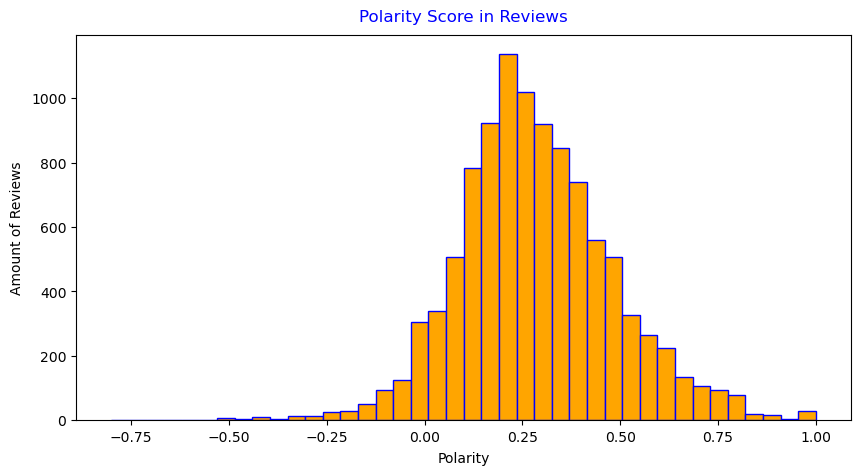

In [36]:
df["polarity"].plot(kind="hist", bins=40, edgecolor="blue", linewidth=1, color="orange", figsize=(10,5))
plt.title("Polarity Score in Reviews", color="blue", pad=10)
plt.xlabel("Polarity", labelpad=5)
plt.ylabel("Amount of Reviews", labelpad=5)
plt.show()

Reviews with negative polarity will be in range of [-1, 0), neutral ones will be 0.0, and positive reviews will have the range of (0, 1].

From the histogram above, we know that most of the reviews are distributed in positive sentiments, meaning that what we extracted from our analysis before is true. Statistically, this histogram shows that our data is normally distributed, but not with standard distribution. In conclusion, we know for sure that our analysis about the amount of sentiments from the reviews is correct and corresponds to the histogram above.

**Review Length**

In [39]:
df["length"] = df["reviews"].astype(str).apply(len)

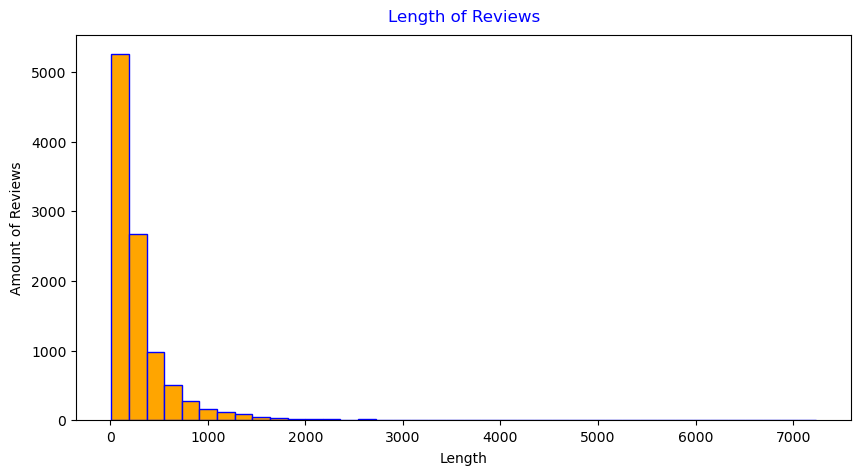

In [40]:
df["length"].plot(kind="hist", bins=40, edgecolor="blue", linewidth=1, color="orange", figsize=(10,5))
plt.title("Length of Reviews", color="blue", pad=10)
plt.xlabel("Length", labelpad=5)
plt.ylabel("Amount of Reviews", labelpad=5)
plt.show()

Based on this, we know that our review has text length between approximately 0-1000 characters. The distribution itself has positive skewness, or in other words it is skewed right, and this means that our reviews rarely has larger length than 1000 characters. Of course, the review that we use here is affected by the text preprocessing phase, so the length might not be the actual value of the review itself as some words might have been omitted already. This will also have the same effect when we count the total number of words in our reviews.

**Word Count**

In [43]:
df["word_counts"] = df["reviews"].apply(lambda x: len(str(x).split()))

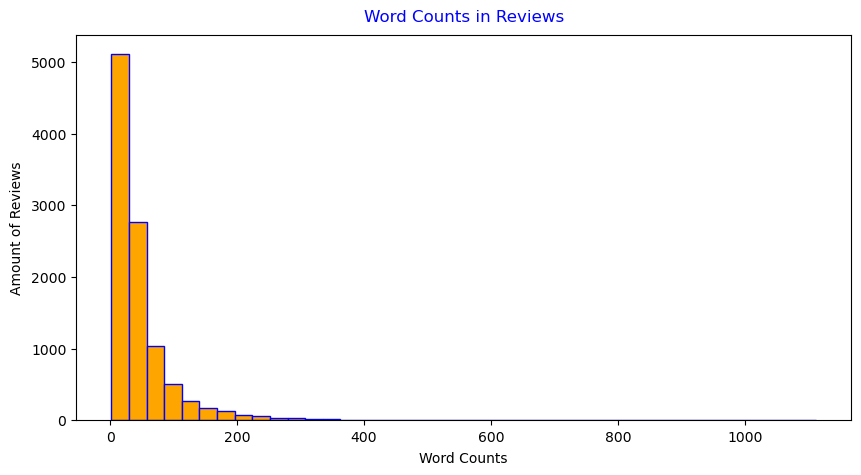

In [44]:
df["word_counts"].plot(kind = "hist", bins = 40, edgecolor = "blue", linewidth = 1, color = "orange", figsize = (10,5))
plt.title("Word Counts in Reviews", color = "blue", pad = 10)
plt.xlabel("Word Counts", labelpad = 5)
plt.ylabel("Amount of Reviews", labelpad = 5)
plt.show()

From the figure above, we infer that most of the reviews consist of 0-200 words. Just like before, the distribution is skewed right and the calculation is affected by our text preprocessing phase before.

## N-Gram Analysis

In [47]:
def Gram_Analysis(Corpus, Gram, N):
  # Vectorizer
  # Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))
  Vectorizer = CountVectorizer(stop_words='english', ngram_range=(Gram, Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)

  return words[:N]

**Filter The DataFrame Based On Sentiments**

In [49]:
# Use dropna() so the base DataFrame is not affected
Positive = df[df["sentiment"] == "Positive"].dropna()
Neutral = df[df["sentiment"] == "Neutral"].dropna()
Negative = df[df["sentiment"] == "Negative"].dropna()

**Unigram of Reviews Based on Sentiments**

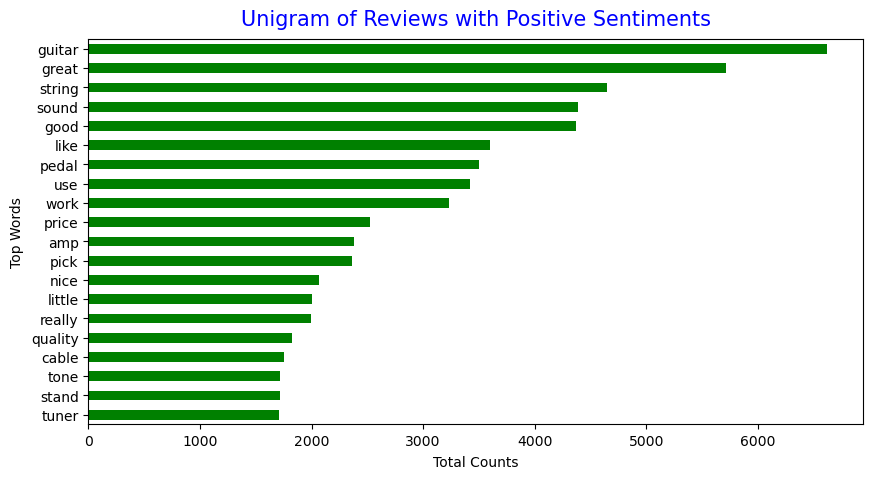

In [51]:
# Finding Unigram
words = Gram_Analysis(Positive["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Unigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

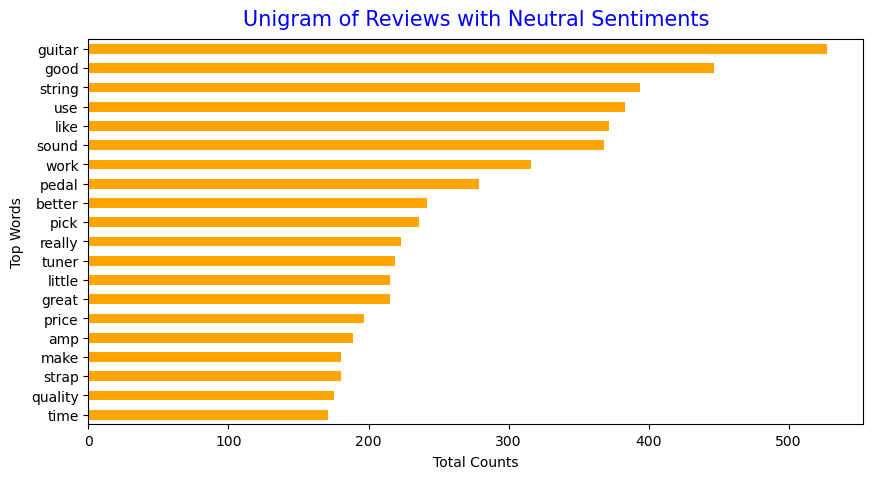

In [52]:
# Finding Unigram
words = Gram_Analysis(Neutral["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Unigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

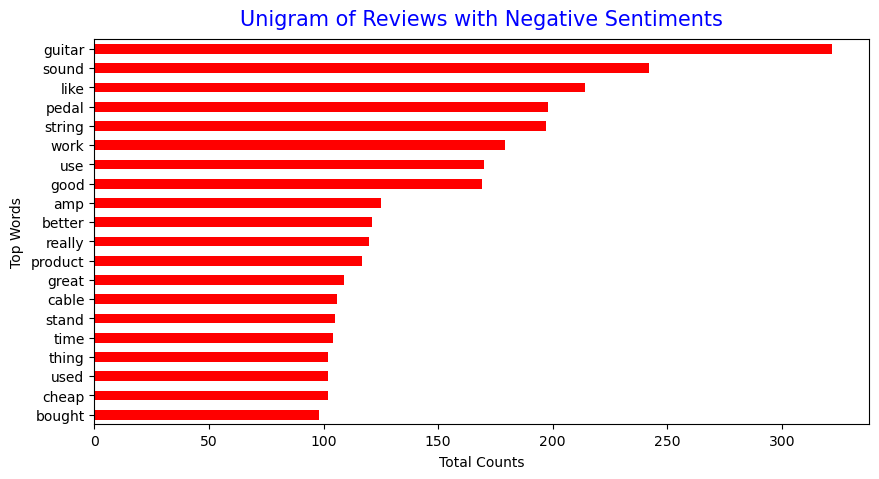

In [53]:
# Finding Unigram
words = Gram_Analysis(Negative["reviews"], 1, 20)
Unigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Unigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Unigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

These unigrams are not really accurate, because we can clearly see that even for postive sentiments, the top unigram is the word **guitar** which is an object, though from here we might know that the most frequently bought items are guitars or the complement of it. We should try to find the bigram and see how accurate it can describe each sentiments

**Bigram of Reviews Based On Sentiments**

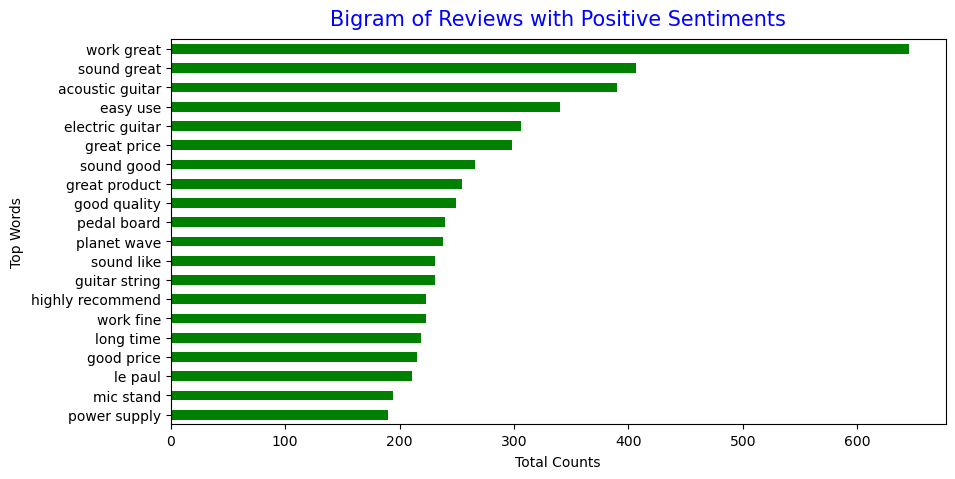

In [56]:
# Finding Bigram
words = Gram_Analysis(Positive["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Bigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

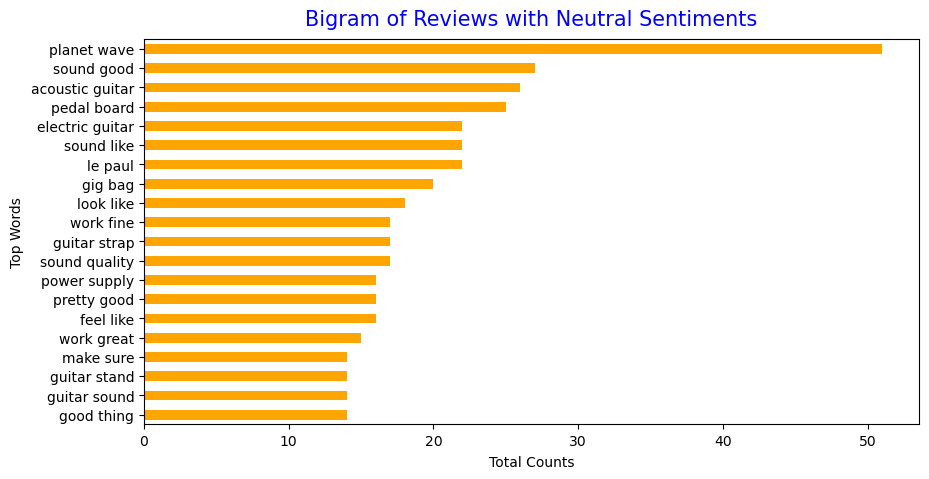

In [57]:
# Finding Bigram
words = Gram_Analysis(Neutral["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Bigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

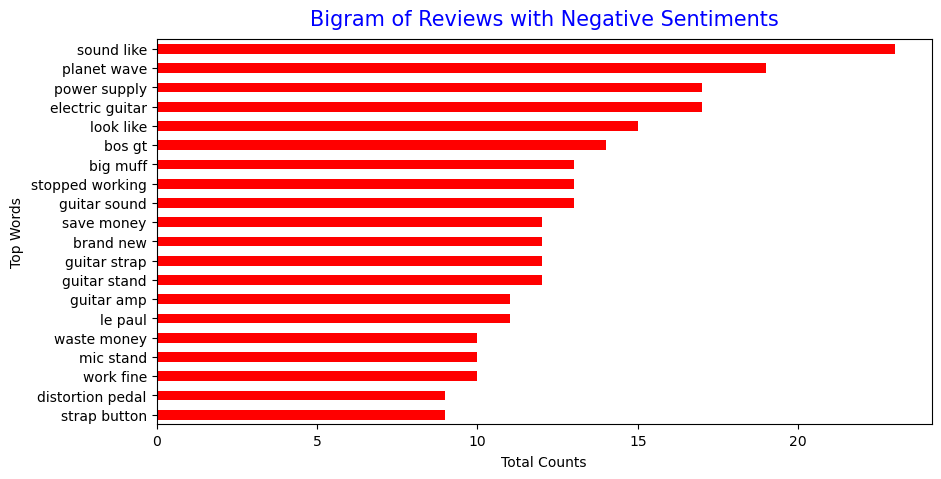

In [58]:
# Finding Bigram
words = Gram_Analysis(Negative["reviews"], 2, 20)
Bigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Bigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

The bigrams work better than the unigrams, because we can actually see some phrases that really describe what a good sentiment is. Although, in some parts we can still see guitar objects as the top words, which make us believe that our interpretation about the most selling items are related to guitars.

**Trigram of Reviews Based On Sentiments**

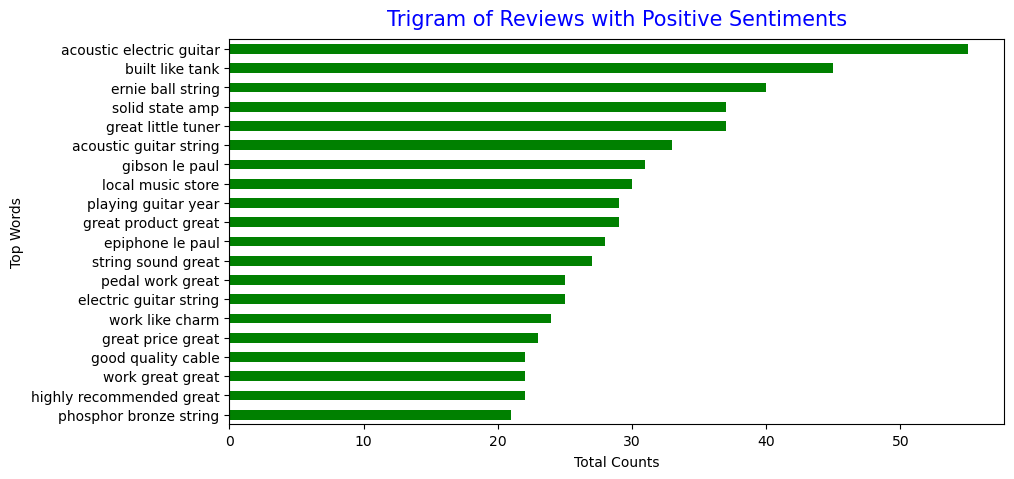

In [61]:
# Finding Trigram
words = Gram_Analysis(Positive["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "green", figsize = (10, 5))
plt.title("Trigram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts",labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words",labelpad = 5)
plt.show()

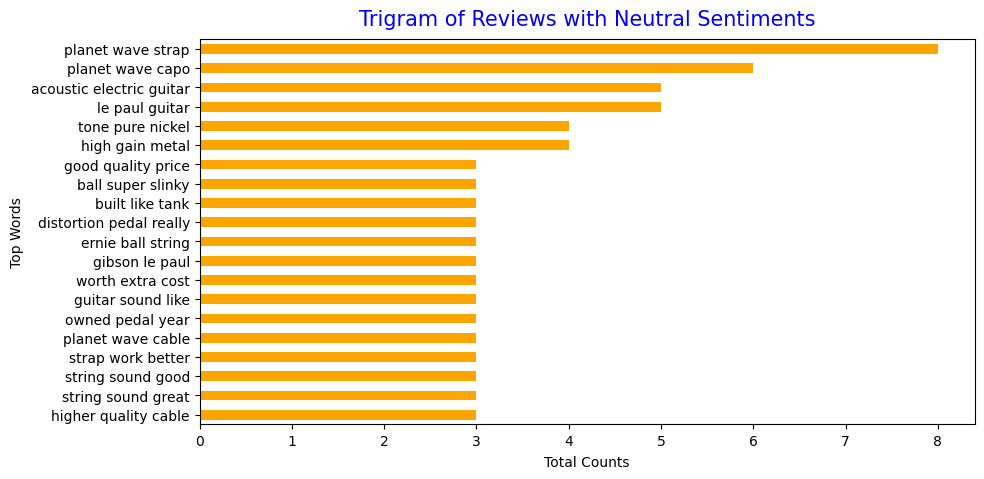

In [62]:
# Finding Trigram
words = Gram_Analysis(Neutral["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "orange", figsize = (10, 5))
plt.title("Trigram of Reviews with Neutral Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

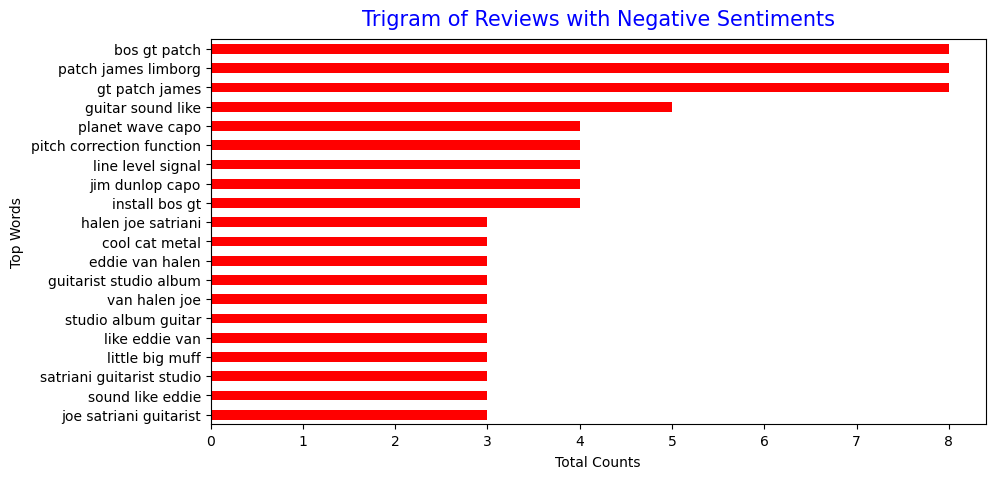

In [63]:
# Finding Trigram
words = Gram_Analysis(Negative["reviews"], 3, 20)
Trigram = pd.DataFrame(words, columns = ["Words", "Counts"])

# Visualization
Trigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = "red", figsize = (10, 5))
plt.title("Trigram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, color = "blue", pad = 10)
plt.xlabel("Total Counts", labelpad = 5)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", labelpad = 5)
plt.show()

We can say that the trigrams are slightly better to describe each sentiments, although negative trigrams say a lot about bad products which we can infer from the top words above. From the N-Gram Analysis, we can also see how the decision of not removing not in our list of stopwords affects our data as we keep the meaning of negation phrases.

## Word Clouds

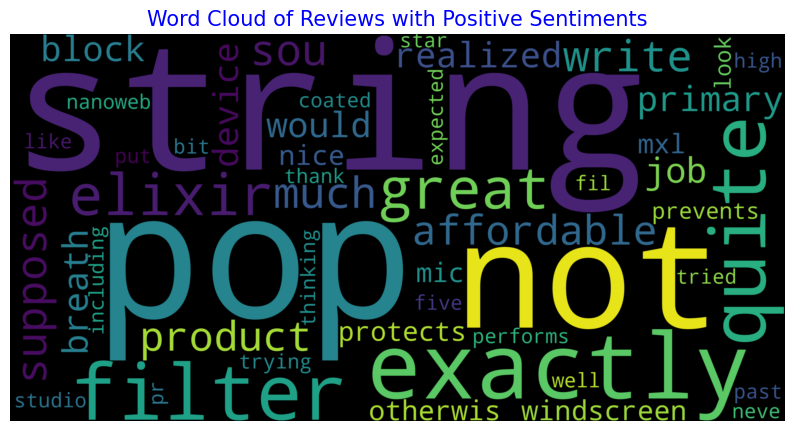

In [66]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Positive["reviews"]))
plt.figure(figsize = (10, 10))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews with Positive Sentiments", fontsize=15, color="blue")
plt.show()

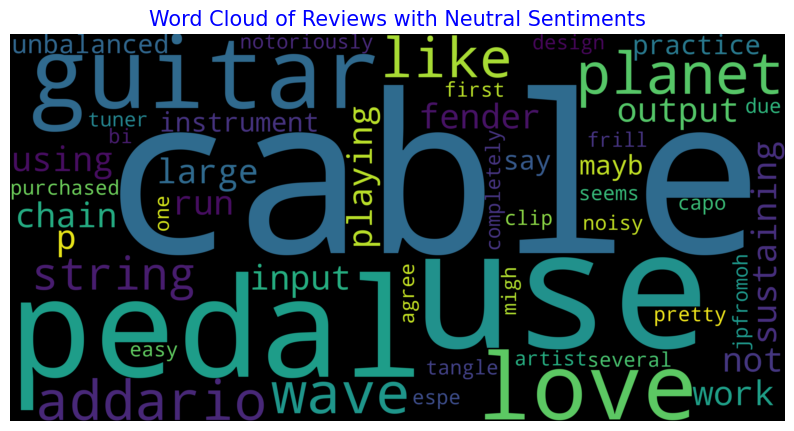

In [67]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Neutral["reviews"]))
plt.figure(figsize = (10, 10))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews with Neutral Sentiments", fontsize=15, color="blue")
plt.show()

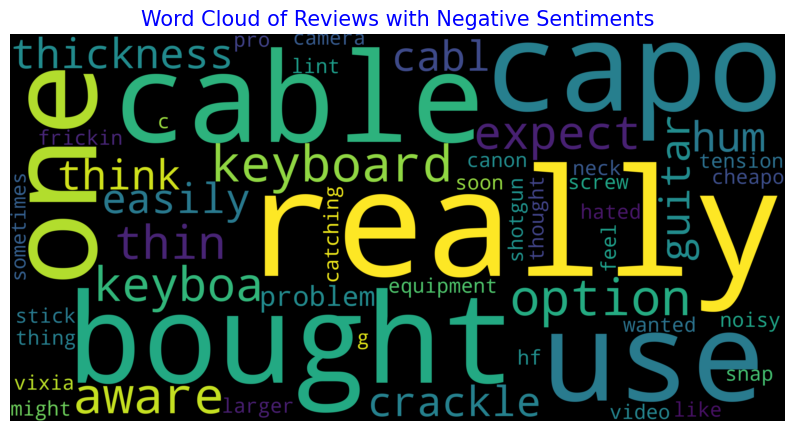

In [68]:
wordCloud = WordCloud(max_words = 50, width = 3000, height = 1500, stopwords = Stopwords).generate(str(Negative["reviews"]))
plt.figure(figsize = (10, 10))
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.title("Word Cloud of Reviews with Negative Sentiments", fontsize=15, color="blue")
plt.show()

From these word clouds, not only we can see words that really describe our sentiments, but just like our N-Grams Analysis we can see objects being discussed in the reviews given.

## Feature Engineering

**Drop Insignificant Columns**

In [72]:
Columns = ["reviewerID", "asin", "reviewerName", "helpful", "unixReviewTime", "reviewTime", "polarity", "length", "word_counts", "overall"]
df.drop(columns = Columns, axis = 1, inplace = True)

We dropped these columns to make our dataset concise. We now have two columns as our independent variables and the last column as dependent variables. To continue, we must encode our label as a set of numbers corresponding to each categories of it.

**Current State of The Dataset**

In [75]:
df.head()

,reviews,sentiment
0,not much write exactly supposed filter pop sou...,Positive
1,product exactly quite affordable not realized ...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great look performs like studio fil...,Positive


**Encoding our Target Value**

In [165]:
Encoder = LabelEncoder()
df["sentiment"] = Encoder.fit_transform(df["sentiment"])

In [124]:
df["sentiment"].value_counts()

sentiment
2    9022
1     772
0     467
Name: count, dtype: int64

We had successfully encoded our sentiment into numbers so that our model can easily figure it out. From above, we know that the label **Positive is encoded into 2**, **Neutral into 1**, and **Negative into 0**. Now, we have to give importance of each words in the whole review, i.e. giving them weights. We can do this by using TF-IDF (Term Frequency - Inverse Document Frequency) Vectorizer.

**TF-IDF Vector**

In [136]:
# Defining our vectorizer with total words of 5000 and with bigram model
TF_IDF = TfidfVectorizer(max_features = 5000, ngram_range = (2, 2))

# Fitting and transforming our reviews into a matrix of weighed words
# This will be our independent features
X = TF_IDF.fit_transform(df["reviews"])

# Check our matrix shape
X.shape

(10261, 5000)

In [140]:
# Declaring our target variable
y = df["sentiment"]

From the shape, we successfully transformed our reviews with TF-IDF Vectorizer of 7000 top bigram words. Now, as we know from before, our data is kind of imbalanced with very little neutral and negative values compared to positive sentiments. We need to balance our dataset before going into modelling process.

**Resampling Our Dataset**

There are many ways to do resampling to an imbalanced dataset, such as SMOTE and Bootstrap Method. We will use SMOTE (Synthetic Minority Oversampling Technique) that will randomly generate new replicates of our undersampling data to balance our dataset.

In [149]:
Counter(y)

Counter({2: 9022, 1: 772, 0: 467})

In [155]:
Balancer = SMOTE(random_state = 42)
X_final, y_final = Balancer.fit_resample(X, y)

In [157]:
Counter(y_final)

Counter({2: 9022, 1: 9022, 0: 9022})

Now our data is already balanced as we can see from the counter of each sentiment categories before and after the resampling with SMOTE.

**Splitting the dataset**

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, random_state = 42)

We splitted our dataset into **75:25** portion respectively for the training and test set.

## Model Selection & Evaluation

We do not really know what is the best model that fits our data well. Because of that, we will need to try every classification models available and find the best models using the Confusion Matrix and F1 Score as our main metrics, and the rest of the metrics as our support. First, we should do some cross validation techniques in order to find the best model.

**Model Building**

We are using K-Fold Cross Validation on our early dataset (before resampling) because the CV itself is not affected by the imbalanced dataset as it splits the dataset and takes into account every validations. If we use the CV on the balanced dataset that we got from resampling we should be able to get similar result.

In [182]:
DTree = DecisionTreeClassifier()
LogReg = LogisticRegression()
SVC = SVC()
RForest = RandomForestClassifier()
Bayes = BernoulliNB()
KNN = KNeighborsClassifier()

Models = [DTree, LogReg, SVC, RForest, Bayes, KNN]
Models_Dict = {0: "Decision Tree", 1: "Logistic Regression", 2: "SVC", 3: "Random Forest", 4: "Naive Bayes", 5: "K-Neighbors"}

for i, model in enumerate(Models):
  print("{} Test Accuracy: {}".format(Models_Dict[i], cross_val_score(model, X, y, cv = 10, scoring = "accuracy").mean()))

Decision Tree Test Accuracy: 0.821751785609214
Logistic Regression Test Accuracy: 0.8819802942387887
SVC Test Accuracy: 0.8805184008381876
Random Forest Test Accuracy: 0.8758404178790589
Naive Bayes Test Accuracy: 0.8099589827104816
K-Neighbors Test Accuracy: 0.8476764777897356


We got six models on our sleeves and from the results of **10-Fold Cross Validation**, we know that the **Logistic Regression model** is the best model with the **highest accuracy**, slightly beating the SVC. Because of this, we will use the best model in predicting our sentiment, also to tune our parameter and evaluate the end-result of how well the model works.

**Hyperparametric Tuning**

In [193]:
Param = {"C": np.logspace(-4, 4, 50), "penalty": ['l1', 'l2']}
grid_search = GridSearchCV(estimator = LogisticRegression(random_state = 42), param_grid = Param, scoring = "accuracy", cv = 10, verbose = 0, n_jobs = -1)

grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\Users\dprsh\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
500 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dprsh\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dprsh\anaconda\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\dprsh\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1194, in fit
    solver = _

Best Accuracy: 94.73 %
Best Parameters: {'C': 10000.0, 'penalty': 'l2'}


We got a nice accuracy on our training set, which is **94.73%** and from our Grid Search, we are also able to find our optimal hyperparameters. It is time to finish our model using these parameters to get the best model of Logistic Regression.

**Best Model**

In [196]:
Classifier = LogisticRegression(random_state = 42, C = 6866.488450042998, penalty = 'l2')
Classifier.fit(X_train, y_train)

Prediction = Classifier.predict(X_test)

Now that our model is done, we will test our model on our test set. The metrics that we will evaluate is based on this prediction that we made here.

**Metrices**

In [202]:
#accuracy on the test score
accuracy_score(y_test, Prediction)

0.9527116890793557

Really high accuracy that we got here, 95.27%. Still, we need to look out for the Confusion Matrix and F1 Score to find out about our model performance.

**Confusion Metrix**

In [206]:
ConfusionMatrix = confusion_matrix(y_test, Prediction)

In [208]:
# Plotting Function for Confusion Matrix
def plot_cm(cm, classes, title, normalized = False, cmap = plt.cm.Blues):

  plt.imshow(cm, interpolation = "nearest", cmap = cmap)
  plt.title(title, pad = 20)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  if normalized:
    cm = cm.astype('float') / cm.sum(axis = 1)[: np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Unnormalized Confusion Matrix")
  
  threshold = cm.max() / 2
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(j, i, cm[i, j], horizontalalignment = "center", color = "white" if cm[i, j] > threshold else "black")

  plt.tight_layout()
  plt.xlabel("Predicted Label", labelpad = 20)
  plt.ylabel("Real Label", labelpad = 20)

Unnormalized Confusion Matrix


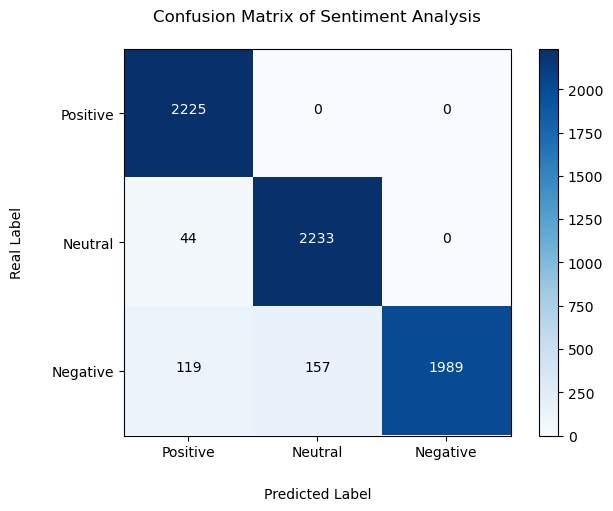

In [210]:
plot_cm(ConfusionMatrix, classes = ["Positive", "Neutral", "Negative"], title = "Confusion Matrix of Sentiment Analysis")

What we can gain from the Confusion Matrix above is that the model overall works well. It is able to categorize both positive and neutral sentiments correctly, while it seems to struggle a bit at determining negative sentiments. Of course, this is the effect of imbalanced data that we got from our original dataset, and luckily we can minimize the effect thanks to our SMOTE resampling before.

**Classification Scores**

In [214]:
print(classification_report(y_test, Prediction))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2225
           1       0.93      0.98      0.96      2277
           2       1.00      0.88      0.94      2265

    accuracy                           0.95      6767
   macro avg       0.96      0.95      0.95      6767
weighted avg       0.96      0.95      0.95      6767



Overall, to each of our sentiment categories, we got F1 Score of 95%, which is great and because of that we can conclude that our model works well on the dataset.

**ROC-AUC Curve**

In [255]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from numpy import interp
from itertools import cycle

In [235]:
#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25,
                                                    random_state=0)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=10))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [245]:
#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [251]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
# aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

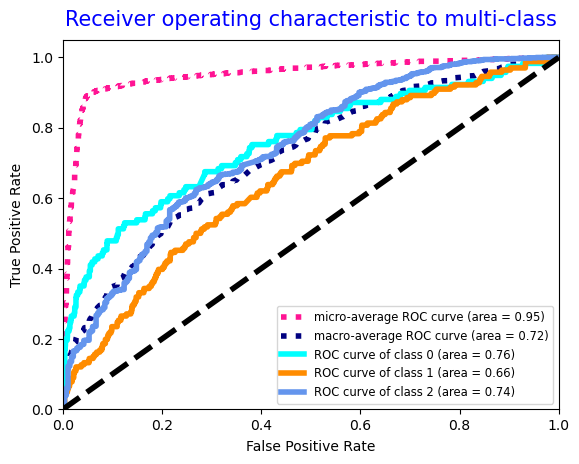

In [269]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', labelpad=5)
plt.ylabel('True Positive Rate', labelpad=5)
plt.title('Receiver operating characteristic to multi-class', fontsize = 15, color = "blue", pad=10)
plt.legend(loc="lower right", fontsize="small")
plt.show()

Considering the ROC curve for classes, class 2 and 0 have been classified pretty well a their area under the curve is high. We can chose any threshold between 0.6-0.8 to get the optimal number of TPR and FPR.

Coming to micro and macro average, micro average preforms really well and macro average shows a not very good score. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric. In a multi-class classification setup, micro-average is preferable if you suspect there might be class imbalance'